In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
#import csv
pooled_videos_df = pd.read_csv('pooled_videos_df.csv')
SentiPOS = pd.read_csv('videoTitleSentiments_df_sent_structure.csv')
ObjD = pd.read_csv('object_detection_df.csv')
channel_df = pd.read_csv('channel_df.csv')
socialblade_df = pd.read_csv('socialblade_df.csv')

# Data Exploration

### Channels

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [4]:
#join channel_df and socialblade_df
channel_info = pd.merge(socialblade_df,channel_df, left_on='Channel ID', right_on='channelId', how='left')
#          .drop(['id1', 'rating'], axis=1)
channel_info

,Channel Name,Channel ID,Category,channelId,description,publishedAt,region,subscriberCount,videoCount,viewCount
0,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814
1,ChrisFix,UCes1EvRjcKU4sY_UEavndBw,AUTO & VEHICLES,UCes1EvRjcKU4sY_UEavndBw,Learn how to fix your own car with my easy to ...,2008-07-30T14:59:12Z,US,6920000,337,1020793024
2,MotorTrend Channel,UCsAegdhiYLEoaFGuJFVrqFQ,AUTO & VEHICLES,UCsAegdhiYLEoaFGuJFVrqFQ,The ultimate automotive streaming service. Get...,2006-03-11T08:32:34Z,US,6580000,2214,1169502258
3,carwow,UCUhFaUpnq31m6TNX2VKVSVA,AUTO & VEHICLES,UCUhFaUpnq31m6TNX2VKVSVA,On the lookout for your next car? Head to carw...,2014-01-02T16:32:13Z,US,4650000,1317,1401956976
4,Supercar Blondie,UCKSVUHI9rbbkXhvAXK-2uxA,AUTO & VEHICLES,UCKSVUHI9rbbkXhvAXK-2uxA,"I'm Alex, that girl with the cars and I hunt d...",2007-09-12T17:33:49Z,US,4700000,239,363377842
...,...,...,...,...,...,...,...,...,...,...
155,Food Insider,UCwiTOchWeKjrJZw7S1H__1g,TRAVEL,UCwiTOchWeKjrJZw7S1H__1g,What you want to know about food. A division o...,2017-10-17T21:11:29Z,US,2560000,1052,864259797
156,Sam Chui,UCfYCRj25JJQ41JGPqiqXmJw,TRAVEL,UCfYCRj25JJQ41JGPqiqXmJw,My soul is in the sky! I hope my videos can br...,2007-11-04T00:22:28Z,US,2340000,337,511078250
157,bald and bankrupt,UCxDZs_ltFFvn0FDHT6kmoXA,TRAVEL,UCxDZs_ltFFvn0FDHT6kmoXA,Going off the map in former Soviet lands...,2018-06-12T11:56:25Z,US,2250000,212,293687890
158,FUNG BROS.,UC9avFXTdbSo5ATvzTRnAVFg,TRAVEL,UC9avFXTdbSo5ATvzTRnAVFg,NEW VIDEOS MONDAYS AND THURSDAYS** Two brother...,2011-05-22T00:19:55Z,US,2120000,873,422298713


In [5]:
channel_info[channel_info["Channel ID"]==channel_info["channelId"]]

,Channel Name,Channel ID,Category,channelId,description,publishedAt,region,subscriberCount,videoCount,viewCount
0,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814
1,ChrisFix,UCes1EvRjcKU4sY_UEavndBw,AUTO & VEHICLES,UCes1EvRjcKU4sY_UEavndBw,Learn how to fix your own car with my easy to ...,2008-07-30T14:59:12Z,US,6920000,337,1020793024
2,MotorTrend Channel,UCsAegdhiYLEoaFGuJFVrqFQ,AUTO & VEHICLES,UCsAegdhiYLEoaFGuJFVrqFQ,The ultimate automotive streaming service. Get...,2006-03-11T08:32:34Z,US,6580000,2214,1169502258
3,carwow,UCUhFaUpnq31m6TNX2VKVSVA,AUTO & VEHICLES,UCUhFaUpnq31m6TNX2VKVSVA,On the lookout for your next car? Head to carw...,2014-01-02T16:32:13Z,US,4650000,1317,1401956976
4,Supercar Blondie,UCKSVUHI9rbbkXhvAXK-2uxA,AUTO & VEHICLES,UCKSVUHI9rbbkXhvAXK-2uxA,"I'm Alex, that girl with the cars and I hunt d...",2007-09-12T17:33:49Z,US,4700000,239,363377842
...,...,...,...,...,...,...,...,...,...,...
155,Food Insider,UCwiTOchWeKjrJZw7S1H__1g,TRAVEL,UCwiTOchWeKjrJZw7S1H__1g,What you want to know about food. A division o...,2017-10-17T21:11:29Z,US,2560000,1052,864259797
156,Sam Chui,UCfYCRj25JJQ41JGPqiqXmJw,TRAVEL,UCfYCRj25JJQ41JGPqiqXmJw,My soul is in the sky! I hope my videos can br...,2007-11-04T00:22:28Z,US,2340000,337,511078250
157,bald and bankrupt,UCxDZs_ltFFvn0FDHT6kmoXA,TRAVEL,UCxDZs_ltFFvn0FDHT6kmoXA,Going off the map in former Soviet lands...,2018-06-12T11:56:25Z,US,2250000,212,293687890
158,FUNG BROS.,UC9avFXTdbSo5ATvzTRnAVFg,TRAVEL,UC9avFXTdbSo5ATvzTRnAVFg,NEW VIDEOS MONDAYS AND THURSDAYS** Two brother...,2011-05-22T00:19:55Z,US,2120000,873,422298713


In [8]:
channel_info["viewCount"].max()

80047635676

In [10]:
channel_info[channel_info["viewCount"]==80047635676]

,Channel Name,Channel ID,Category,channelId,description,publishedAt,region,subscriberCount,videoCount,viewCount
20,Cocomelon - Nursery Rhymes,UCbCmjCuTUZos6Inko4u57UQ,EDUCATION,UCbCmjCuTUZos6Inko4u57UQ,"At CoComelon, our primary goal has always been...",2006-09-01T22:18:49Z,US,95500000,570,80047635676


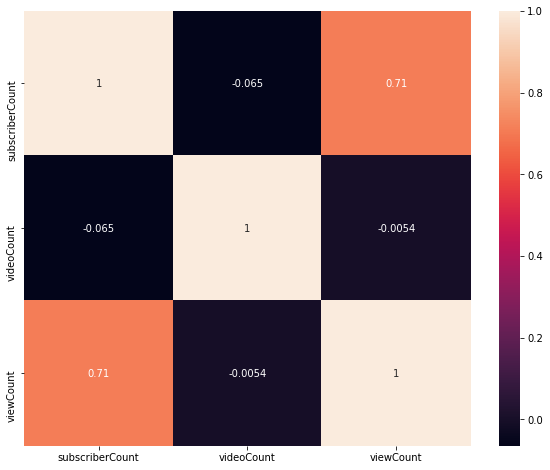

In [6]:
#corr Matrix
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sb.heatmap(channel_info[['subscriberCount','videoCount','viewCount']].corr(), annot=True)
plt.show()

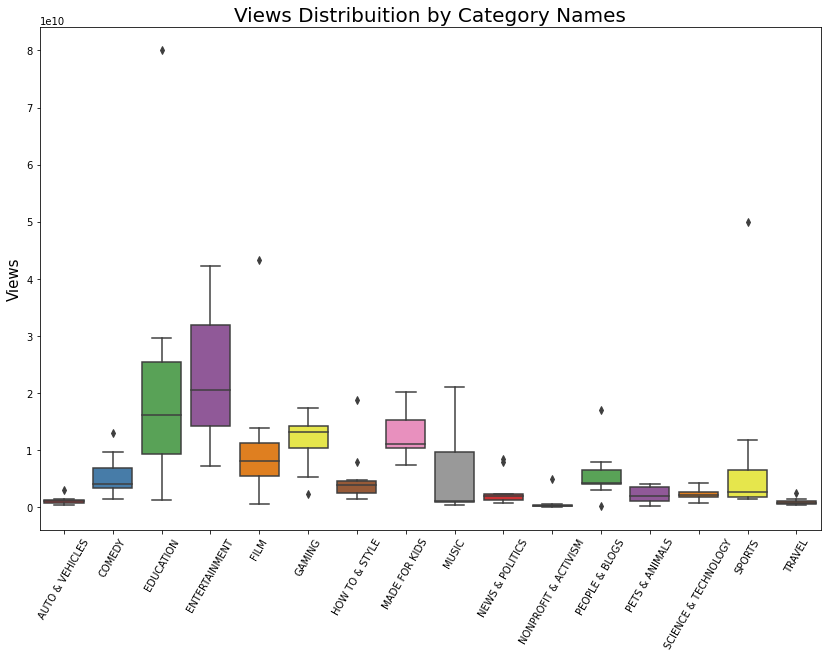

In [7]:
plt.figure(figsize = (14,9))
plt.subplot()
g1 = sb.boxplot(x='Category', y='viewCount', data=channel_info, palette="Set1")
g1.set_xticklabels(g1.get_xticklabels(),rotation=60)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

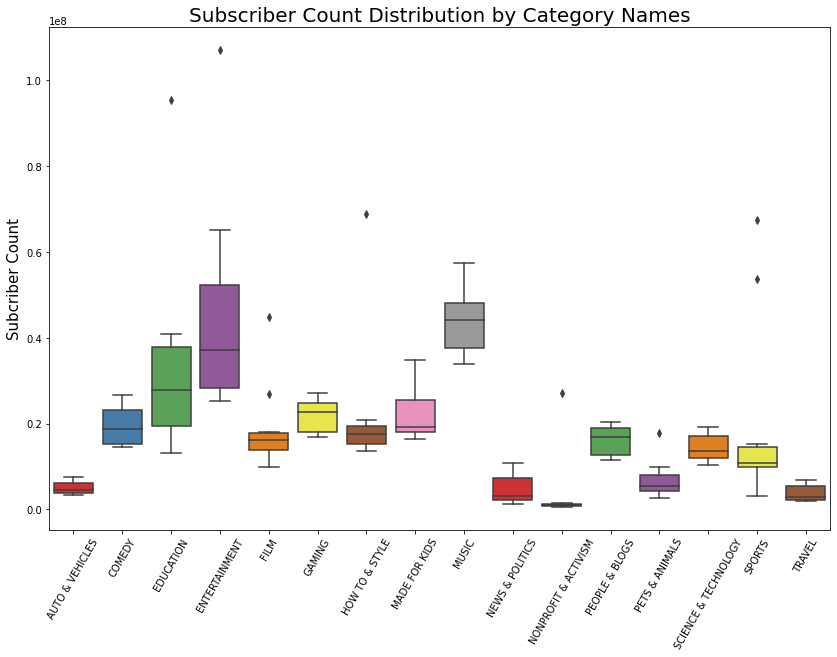

In [13]:
plt.figure(figsize = (14,9))
plt.subplot()
g1 = sb.boxplot(x='Category', y='subscriberCount', data=channel_info, palette="Set1")
g1.set_xticklabels(g1.get_xticklabels(),rotation=60)
g1.set_title("Subscriber Count Distribution by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Subcriber Count", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

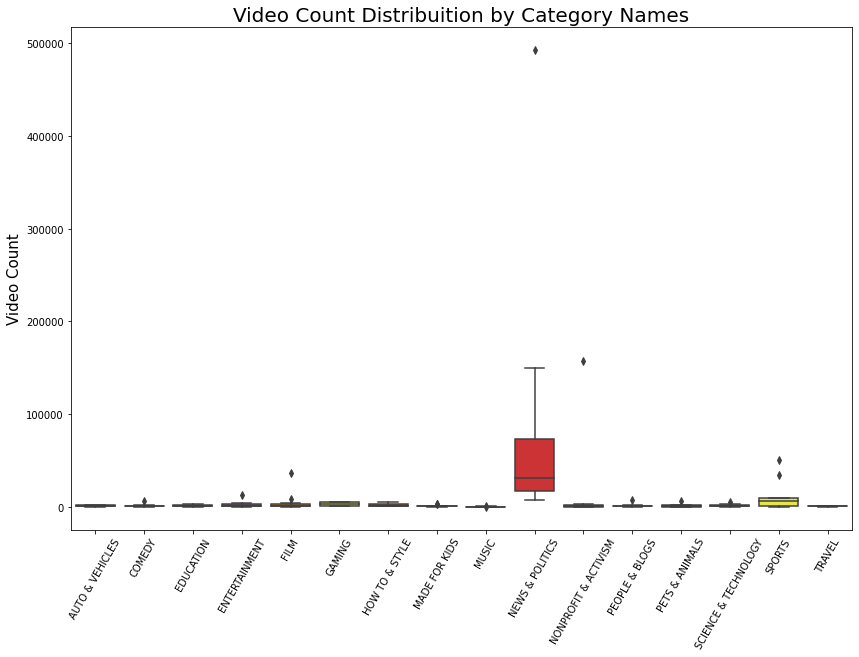

In [12]:
plt.figure(figsize = (14,9))
plt.subplot()
g1 = sb.boxplot(x='Category', y='videoCount', data=channel_info, palette="Set1")
g1.set_xticklabels(g1.get_xticklabels(),rotation=60)
g1.set_title("Video Count Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Video Count", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

### Videos

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pooled_videos_df.describe()

,commentCount,dislikeCount,likeCount,viewCount
count,407093.000,407093.000,407093.000,407093.000
mean,1899.447,2466.455,22426.907,2273508.224
std,14028.986,48830.686,144463.742,24958129.356
min,0.000,0.000,0.000,0.000
25%,13.000,9.000,71.000,6828.000
50%,126.000,69.000,749.000,71108.000
75%,722.000,494.000,7513.000,653540.000
max,2921705.000,18429502.000,24568733.000,6810774408.000


In [9]:
video_cat = pd.merge(channel_info,pooled_videos_df, left_on='Channel ID', right_on='channelId', how='left')

In [13]:
import re #add title length
video_cat['titleLen'] = video_cat['videoTitle'].map(lambda x: len(re.findall(r'\w+', x)))

In [14]:
video_cat.head()

,Channel Name,Channel ID,Category,channelId_x,description_x,publishedAt_x,region,subscriberCount,videoCount,viewCount_x,...,description_y,publishedAt_y,videoId,thumbnails,videoTitle,commentCount,dislikeCount,likeCount,viewCount_y,titleLen
0,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,"In this week's Top Gear, Flintoff gets his han...",2020-10-09 09:35:54,NXX338WY_Lw,https://i.ytimg.com/vi/NXX338WY_Lw/default.jpg,PREVIEW: Attempting 200mph in the Jaguar XJ220...,528.000,257.000,5819.000,184447.000,11
1,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,"From the humble new Volkswagen GTI, right down...",2020-10-09 11:21:23,dtHcdU2c71Y,https://i.ytimg.com/vi/dtHcdU2c71Y/default.jpg,Which car will win Top Gear Speed Week 2020? (...,568.000,273.000,7136.000,217619.000,14
2,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,Here's Chris Harris' take on the rocket-disgui...,2020-10-07 07:40:22,vnrtWe-RAzg,https://i.ytimg.com/vi/vnrtWe-RAzg/default.jpg,Chris Harris on... the Ferrari SF90 Stradale |...,1091.000,408.000,10189.000,437777.000,9
3,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,"16 contenders, 8,553bhp and a festival to reme...",2020-10-06 13:59:38,Ra1F0TsOCPs,https://i.ytimg.com/vi/Ra1F0TsOCPs/default.jpg,Chris Harris vs 2020’s Best Performance Cars |...,579.000,202.000,7126.000,191070.000,13
4,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,"The 986bhp Ferrari SF90 is, unsurprisingly, no...",2020-10-06 07:36:13,fXysipmTxcQ,https://i.ytimg.com/vi/fXysipmTxcQ/default.jpg,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,888.000,168.000,9697.000,572569.000,11


#### Correlation Matrix of numerical variables

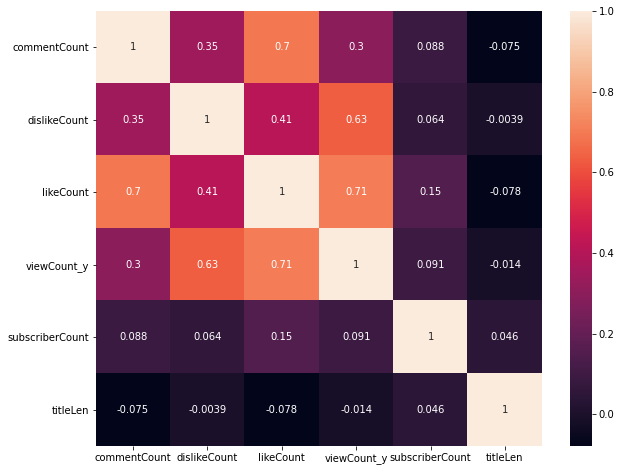

In [16]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sb.heatmap(video_cat[['commentCount','dislikeCount','likeCount','viewCount_y','subscriberCount','titleLen']].corr(), annot=True)
plt.show()

### Publishing Time

In [17]:
video_cat["publishedAt"]=pd.to_datetime(video_cat["publishedAt_y"])

In [18]:
video_cat["publish_Year"]=video_cat["publishedAt"].apply(lambda time:time.year)
video_cat["publish_Month"]=video_cat["publishedAt"].apply(lambda time:time.month)
video_cat["publishedDay"]=video_cat["publishedAt"].apply(lambda time:time.day)
video_cat["publish_Day_of_Week"]=video_cat["publishedAt"].apply(lambda time:time.dayofweek)
video_cat["Publish_Hour"]=video_cat["publishedAt"].apply(lambda time:time.hour)

In [19]:
video_cat

,Channel Name,Channel ID,Category,channelId_x,description_x,publishedAt_x,region,subscriberCount,videoCount,viewCount_x,...,dislikeCount,likeCount,viewCount_y,titleLen,publishedAt,publish_Year,publish_Month,publishedDay,publish_Day_of_Week,Publish_Hour
0,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,257.000,5819.000,184447.000,11,2020-10-09 09:35:54,2020,10,9,4,9
1,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,273.000,7136.000,217619.000,14,2020-10-09 11:21:23,2020,10,9,4,11
2,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,408.000,10189.000,437777.000,9,2020-10-07 07:40:22,2020,10,7,2,7
3,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,202.000,7126.000,191070.000,13,2020-10-06 13:59:38,2020,10,6,1,13
4,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814,...,168.000,9697.000,572569.000,11,2020-10-06 07:36:13,2020,10,6,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407088,Drew Binsky,UC0Ize0RLIbGdH5x4wI45G-A,TRAVEL,UC0Ize0RLIbGdH5x4wI45G-A,Hey guys! My name is Drew Binsky and I make da...,2012-07-26T03:24:35Z,US,1940000,781,379113325,...,1.000,155.000,6626.000,5,2015-02-24 08:55:09,2015,2,24,1,8
407089,Drew Binsky,UC0Ize0RLIbGdH5x4wI45G-A,TRAVEL,UC0Ize0RLIbGdH5x4wI45G-A,Hey guys! My name is Drew Binsky and I make da...,2012-07-26T03:24:35Z,US,1940000,781,379113325,...,1.000,105.000,6104.000,6,2015-02-21 13:29:28,2015,2,21,5,13
407090,Drew Binsky,UC0Ize0RLIbGdH5x4wI45G-A,TRAVEL,UC0Ize0RLIbGdH5x4wI45G-A,Hey guys! My name is Drew Binsky and I make da...,2012-07-26T03:24:35Z,US,1940000,781,379113325,...,2.000,132.000,10094.000,9,2015-02-19 05:40:29,2015,2,19,3,5
407091,Drew Binsky,UC0Ize0RLIbGdH5x4wI45G-A,TRAVEL,UC0Ize0RLIbGdH5x4wI45G-A,Hey guys! My name is Drew Binsky and I make da...,2012-07-26T03:24:35Z,US,1940000,781,379113325,...,15.000,269.000,9403.000,8,2015-01-30 09:03:03,2015,1,30,4,9


In [20]:
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} #Day of the week
video_cat["publish_Day_of_Week"]=video_cat["publish_Day_of_Week"].map(dmap1)

In [21]:
df11=video_cat.groupby(["Category","publish_Day_of_Week"])['channelId_x'].size().reset_index(name='count')
print(df11)

            Category publish_Day_of_Week  count
0    AUTO & VEHICLES                 Fri   1367
1    AUTO & VEHICLES                 Mon    952
2    AUTO & VEHICLES                 Sat    549
3    AUTO & VEHICLES                 Sun    490
4    AUTO & VEHICLES                 Thu   1364
..               ...                 ...    ...
107           TRAVEL                 Sat    558
108           TRAVEL                 Sun    537
109           TRAVEL                 Thu    902
110           TRAVEL                 Tue    776
111           TRAVEL                 Wed    840

[112 rows x 3 columns]


In [22]:
pivot_df = df11.pivot(index='publish_Day_of_Week', columns='Category', values='count')

In [23]:
pivot_df

Category,AUTO & VEHICLES,COMEDY,EDUCATION,ENTERTAINMENT,FILM,GAMING,HOW TO & STYLE,MADE FOR KIDS,MUSIC,NEWS & POLITICS,NONPROFIT & ACTIVISM,PEOPLE & BLOGS,PETS & ANIMALS,SCIENCE & TECHNOLOGY,SPORTS,TRAVEL
publish_Day_of_Week,,,,,,,,,,,,,,,,
Fri,1367,2048,1858,3248,6121,3073,3142,1646,323,27632,3625,2422,1764,1353,8859,886
Mon,952,720,1348,1566,5040,2749,2677,1003,155,24544,4261,1453,2025,928,7780,803
Sat,549,1122,606,1606,550,2723,1093,749,94,13220,2150,1512,454,1117,7318,558
Sun,490,181,108,819,159,2494,1055,482,89,13387,2274,632,353,624,6022,537
Thu,1364,2008,1717,2948,6722,3159,2772,1338,255,29487,4057,1767,1718,1283,9963,902
Tue,1289,1679,1627,2769,5840,2998,3194,1271,250,29040,4127,1657,1848,1331,10985,776
Wed,1237,1612,1396,3016,6432,3098,3030,1284,187,30469,4216,1808,1681,1199,10949,840


Text(0.5, 0, 'Day of Week')

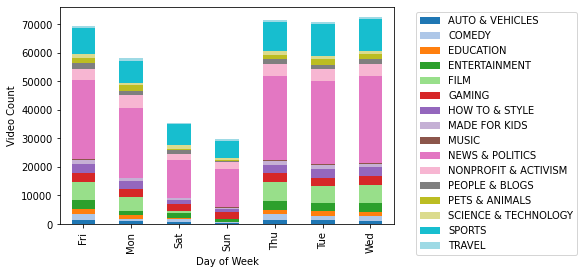

In [24]:
plot1 = pivot_df.plot.bar(stacked=True, colormap = 'tab20')
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plot1.set_ylabel("Video Count", fontsize=10)
plot1.set_xlabel("Day of Week", fontsize=10)

In [35]:
df12=video_cat.groupby(["Category","Publish_Hour"])['channelId_x'].size().reset_index(name='count')
pivot_df2 = df12.pivot(index='Publish_Hour', columns='Category', values='count')

Text(0.5, 0, 'Time of Day')

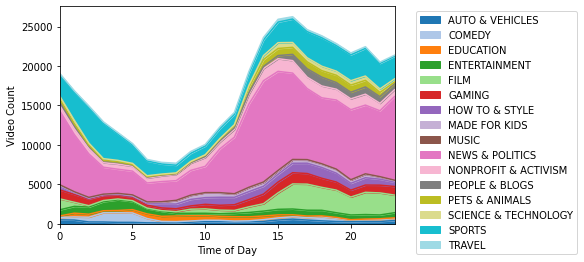

In [50]:
plot2 = pivot_df2.plot.area(colormap = 'tab20')
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plot2.set_ylabel("Video Count", fontsize=10)
plot2.set_xlabel("Time of Day", fontsize=10)

In [63]:
df11[(df11["Category"] == "NEWS & POLITICS")]

,Category,publish_Day_of_Week,count
63,NEWS & POLITICS,Fri,27632
64,NEWS & POLITICS,Mon,24544
65,NEWS & POLITICS,Sat,13220
66,NEWS & POLITICS,Sun,13387
67,NEWS & POLITICS,Thu,29487
68,NEWS & POLITICS,Tue,29040
69,NEWS & POLITICS,Wed,30469


### Most Popular Untruncated Words in Titles
First 70 characters

In [27]:
shortenTitle = [x[0:70] for x in video_cat['videoTitle']]

In [28]:
shortenTitle[0:5]

['PREVIEW: Attempting 200mph in the Jaguar XJ220 | Top Gear: Series 29',
 'Which car will win Top Gear Speed Week 2020? (4K) | The Contenders | T',
 'Chris Harris on... the Ferrari SF90 Stradale | Top Gear',
 'Chris Harris vs 2020’s Best Performance Cars | Top Gear Magazine Speed',
 'FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | Top Gear: Series 29']

In [29]:
import collections
import re
import nltk
from nltk.corpus import stopwords

In [30]:
stopwords = nltk.corpus.stopwords.words('english')
wordcount = collections.defaultdict(int)
pattern = r"\W+"
for sent in shortenTitle:
    for word in sent.lower().split():
        word = re.sub(pattern, ' ', word)
        if word not in stopwords:
            wordcount[word] += 1

In [31]:
# printing most common words
to_print = 21 # whitespace was counted

mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:to_print] 
print("Remove the counted whitespace: " + str(mc[0]))
mc = mc[1:]
print("Most freqent 20 words:")
for word, count in mc:
     print(word, ":", count)

Remove the counted whitespace: (' ', 236120)
Most freqent 20 words:
trump : 18311
news : 18252
new : 15046
scene : 13223
bbc : 10204
movieclips : 10201
nbc : 9834
wwe : 8897
kids : 8242
movie : 8092
top : 7188
coronavirus : 6784
clip : 6665
best : 6585
baby : 6561
today : 6473
vs  : 6457
vs : 6251
us : 5850
5 : 5704


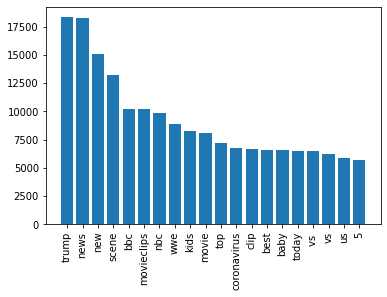

In [32]:
# Draw the bar chart
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
plt.xticks(rotation=90)
plt.show()

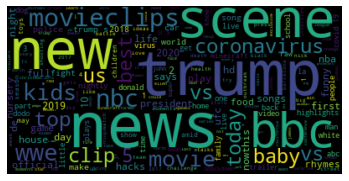

In [33]:
wc = WordCloud().generate_from_frequencies(wordcount)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### videos w POS, Sentiment Analysis and Object Detection

In [34]:
SentiPOS.head()

,videoId,sentence,sentiment,polarity,Sentiment_Type,title_structure,first_sent_tag,first_sent_tag_label
0,NXX338WY_Lw,PREVIEW: Attempting 200mph in the Jaguar XJ220...,0.500,0.500,Positive,PROPN-PUNCT-VERB-NUM-NOUN-ADP-DET-PROPN-PROPN-...,PROPN,11
1,dtHcdU2c71Y,Which car will win Top Gear Speed Week 2020? (...,0.600,0.467,Positive,DET-NOUN-VERB-VERB-PROPN-PROPN-PROPN-PROPN-NUM...,DET,5
2,vnrtWe-RAzg,Chris Harris on... the Ferrari SF90 Stradale |...,0.500,0.500,Positive,PROPN-PROPN-ADP-PUNCT-DET-PROPN-PROPN-PROPN-PR...,PROPN,11
3,Ra1F0TsOCPs,Chris Harris vs 2020’s Best Performance Cars |...,0.750,0.400,Positive,PROPN-PROPN-ADP-NUM-PART-PROPN-PROPN-PROPN-PRO...,PROPN,11
4,fXysipmTxcQ,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,0.500,0.500,Positive,PROPN-PROPN-NOUN-NOUN-PUNCT-PROPN-PROPN-PROPN-...,PROPN,11


Join all data

In [35]:
video_sentiPOS = pd.merge(SentiPOS,video_cat, left_on='videoId', right_on='videoId', how='left')

In [41]:
video_all = pd.merge(video_sentiPOS,ObjD, left_on='videoId', right_on='videoId', how='inner')

In [42]:
video_all.head()

,videoId,sentence,sentiment,polarity,Sentiment_Type,title_structure,first_sent_tag,first_sent_tag_label,Channel Name,Channel ID,...,viewCount_y,titleLen,publishedAt,publish_Year,publish_Month,publishedDay,publish_Day_of_Week,Publish_Hour,humanCount,humanPresence
0,NXX338WY_Lw,PREVIEW: Attempting 200mph in the Jaguar XJ220...,0.500,0.500,Positive,PROPN-PUNCT-VERB-NUM-NOUN-ADP-DET-PROPN-PROPN-...,PROPN,11,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,...,184447.000,11.000,2020-10-09 09:35:54,2020.000,10.000,9.000,Fri,9.000,0,0
1,dtHcdU2c71Y,Which car will win Top Gear Speed Week 2020? (...,0.600,0.467,Positive,DET-NOUN-VERB-VERB-PROPN-PROPN-PROPN-PROPN-NUM...,DET,5,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,...,217619.000,14.000,2020-10-09 11:21:23,2020.000,10.000,9.000,Fri,11.000,0,0
2,vnrtWe-RAzg,Chris Harris on... the Ferrari SF90 Stradale |...,0.500,0.500,Positive,PROPN-PROPN-ADP-PUNCT-DET-PROPN-PROPN-PROPN-PR...,PROPN,11,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,...,437777.000,9.000,2020-10-07 07:40:22,2020.000,10.000,7.000,Wed,7.000,2,1
3,Ra1F0TsOCPs,Chris Harris vs 2020’s Best Performance Cars |...,0.750,0.400,Positive,PROPN-PROPN-ADP-NUM-PART-PROPN-PROPN-PROPN-PRO...,PROPN,11,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,...,191070.000,13.000,2020-10-06 13:59:38,2020.000,10.000,6.000,Tue,13.000,1,1
4,fXysipmTxcQ,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,0.500,0.500,Positive,PROPN-PROPN-NOUN-NOUN-PUNCT-PROPN-PROPN-PROPN-...,PROPN,11,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,...,572569.000,11.000,2020-10-06 07:36:13,2020.000,10.000,6.000,Tue,7.000,0,0


In [39]:
print(video_all.columns.tolist())
#x = channel's
#y's = video's

['videoId', 'sentence', 'sentiment', 'polarity', 'Sentiment_Type', 'title_structure', 'first_sent_tag', 'first_sent_tag_label', 'Channel Name', 'Channel ID', 'Category', 'channelId_x', 'description_x', 'publishedAt_x', 'region', 'subscriberCount', 'videoCount', 'viewCount_x', 'channelId_y', 'description_y', 'publishedAt_y', 'thumbnails', 'videoTitle', 'commentCount', 'dislikeCount', 'likeCount', 'viewCount_y', 'titleLen', 'publishedAt', 'publish_Year', 'publish_Month', 'publishedDay', 'publish_Day_of_Week', 'Publish_Hour', 'humanCount', 'humanPresence']


## Object detection

Text(0, 0.5, 'Mean')

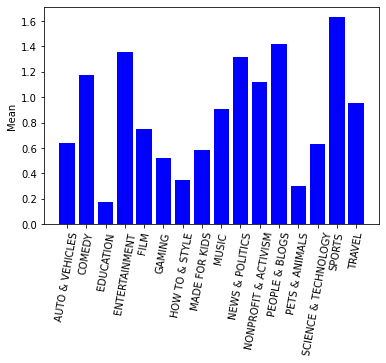

In [44]:
#Mean of Category
x1 = video_all.groupby('Category').mean().reset_index()
plt.bar(range(len(x1)), x1['humanCount'], color="blue")

plt.xticks(range(len(x1)), x1['Category'],rotation=80)
plt.ylabel('Mean')

#### POS

[Text(0, 0.5, 'POS tag of first word')]

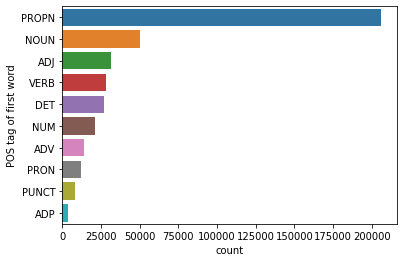

In [45]:
ax1 = sb.countplot(y="first_sent_tag", data=video_all,
              order=video_all.first_sent_tag.value_counts().iloc[:10].index)
ax1.set(ylabel = 'POS tag of first word')   
# ax1.set_xticklabels(months)

In [17]:
video_all.first_sent_tag.value_counts()

PROPN    206152
NOUN      50119
ADJ       31698
VERB      28181
DET       26680
NUM       21027
ADV       13860
PRON      12021
PUNCT      7998
ADP        3880
AUX        2789
X          1503
INTJ        949
SCONJ       902
SYM         734
PART        127
CCONJ        70
Name: first_sent_tag, dtype: int64

Sentiment

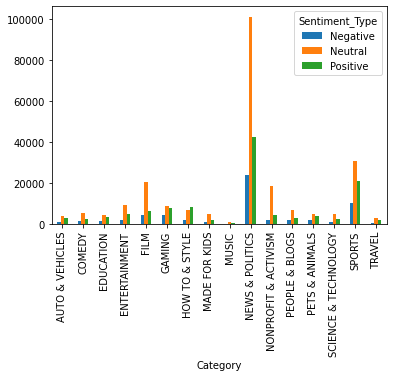

In [21]:
vid_sentiment = video_all.groupby(["Category","Sentiment_Type"])["Sentiment_Type"].count().unstack()
vid_sentiment.plot(kind='bar')